In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv("istanbul_ev_ilanlari(manipüle_edilmis).csv", index_col=0)

In [5]:
data.isnull().sum()

info_          0
location       0
home prices    0
room count     0
m2             0
age            0
floor type     0
dtype: int64

In [6]:
data3 = data.copy()

In [7]:
# object tipindeki verileri sayisal degere ceviriyoruz.
from sklearn.preprocessing import LabelEncoder

le_loc = LabelEncoder()
le_rc = LabelEncoder()
le_ft = LabelEncoder()

data3["location"] = le_loc.fit_transform(data3["location"])
data3["room count"] = le_rc.fit_transform(data3["room count"])
data3["floor type"] = le_ft.fit_transform(data3["floor type"])

In [8]:
data3

,info_,location,home prices,room count,m2,age,floor type
0,Satılık Daire,0,6200000,12,130,26,11
1,Satılık Daire,0,7500000,12,140,30,23
2,Satılık Daire,0,7980000,24,160,31,23
3,Satılık Daire,0,6250000,19,170,20,26
4,Satılık Daire,0,4600000,19,140,40,23
...,...,...,...,...,...,...,...
43447,Satılık Daire,38,7500000,12,130,30,19
43448,Satılık Daire,38,3000000,14,160,15,14
43449,Satılık Daire,38,2600000,12,130,28,3
43450,Satılık Daire,38,2100000,6,100,25,11


In [9]:
X = data3.drop(["home prices", "info_"], axis=1)
y = data3["home prices"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)

In [58]:
from sklearn.model_selection import GridSearchCV ,train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,accuracy_score
from sklearn import model_selection
from sklearn.preprocessing import RobustScaler, StandardScaler

# RandomForestRegressor ile model kurma

In [10]:
from sklearn.ensemble import RandomForestRegressor

In [11]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [12]:
rfr.score(X_test, y_test)

0.7342918540097958

In [13]:
rfr.score(X_train, y_train)

0.9442669538161952

In [14]:
y_pred_rfr = rfr.predict(X_test)

In [51]:
frame_rfr=pd.DataFrame({"actual":y_test, "predict":y_pred_rfr})

In [45]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_rfr))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_rfr))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_rfr)))

Mean Absolute Error: 892816.3667121348
Mean Squared Error: 1918880097902.0984
Root Mean Squared Error: 1385236.4772493173


In [47]:
importance=pd.DataFrame({"importance":rfr.feature_importances_},index= X_train.columns)
importance

,importance
location,0.374232
room count,0.055087
m2,0.310829
age,0.153756
floor type,0.106096


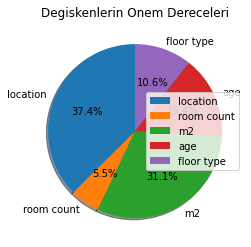

In [50]:
import matplotlib.pyplot as plt
plt.pie(importance["importance"], labels=X_train.columns,autopct='%1.1f%%',shadow=True, startangle=90)
plt.title("Degiskenlerin Onem Dereceleri")
plt.legend(X_train.columns , loc=5)

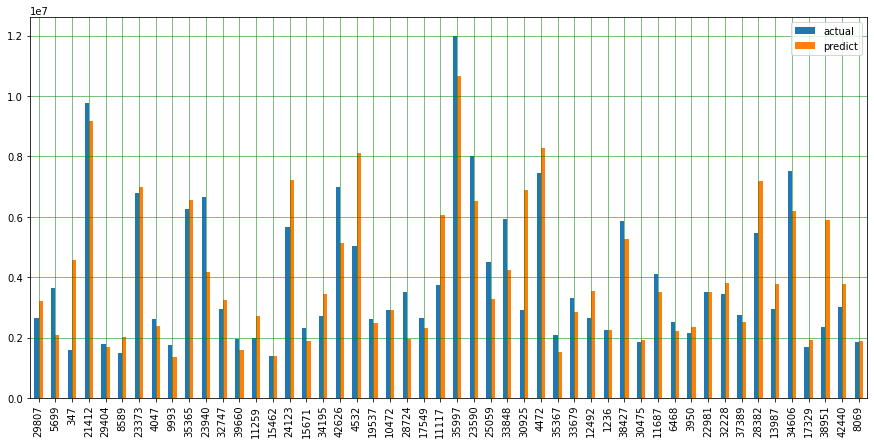

In [55]:
df_temp = frame_rfr.head(50)
df_temp.plot(kind='bar',figsize=(15,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()



# LinearRegression ile model kurma

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler, StandardScaler

In [18]:
scaler = RobustScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [19]:
lr = LinearRegression()
lr.fit(X_train_scaler, y_train)

LinearRegression()

In [20]:
lr.score(X_train_scaler, y_train)

0.22266193458400663

In [21]:
lr.score(X_test_scaler, y_test)

0.22300581649318496

In [22]:
y_pred_lr = lr.predict(X_test_scaler)

In [44]:
frame_lr = pd.DataFrame({"actual":y_test, "predict":y_pred_lr})

In [42]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_lr))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_lr))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Mean Absolute Error: 1800222.8171055051
Mean Squared Error: 5611264454691.899
Root Mean Squared Error: 2368810.768020928


In [43]:
importance=pd.DataFrame({"importance":xgb.feature_importances_},index= X_train.columns)
importance

,importance
location,0.401764
room count,0.111444
m2,0.299362
age,0.112032
floor type,0.075398


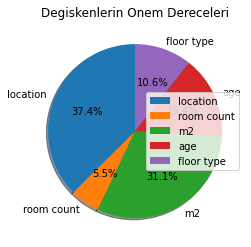

In [57]:
import matplotlib.pyplot as plt
plt.pie(importance["importance"], labels=X_train.columns,autopct='%1.1f%%',shadow=True, startangle=90)
plt.title("Degiskenlerin Onem Dereceleri")
plt.legend(X_train.columns , loc=5)

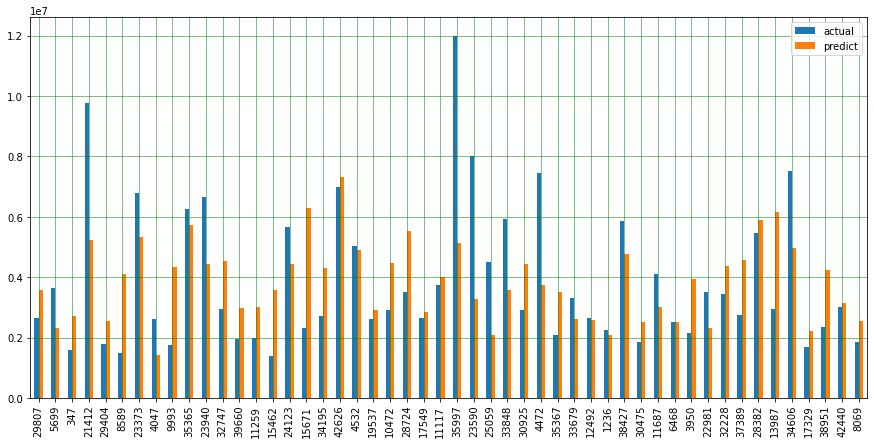

In [54]:
df_temp = frame_lr.head(50)
df_temp.plot(kind='bar',figsize=(15,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# XGBoost ile model kurma

In [27]:
import xgboost as xgb
from xgboost import XGBRegressor


In [28]:
scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [29]:
xgb = XGBRegressor()
xgb.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [30]:
xgb.score(X_test_scaled, y_test)

0.7452344035990861

In [31]:
xgb.score(X_train_scaled, y_train)

0.8016367991421308

In [33]:
y_pred_xgb = xgb.predict(X_test_scaled)

In [59]:
frame_xgb=pd.DataFrame({"actual":y_test, "predict":y_pred_xgb})

In [60]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_xgb))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_xgb))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_xgb)))

Mean Absolute Error: 912135.7467620958
Mean Squared Error: 1839855645908.1802
Root Mean Squared Error: 1356412.7859572028


In [61]:
importance=pd.DataFrame({"importance":xgb.feature_importances_},index= X_train.columns)
importance

,importance
location,0.401764
room count,0.111444
m2,0.299362
age,0.112032
floor type,0.075398


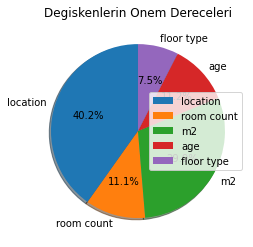

In [62]:
import matplotlib.pyplot as plt
plt.pie(importance["importance"], labels=X_train.columns,autopct='%1.1f%%',shadow=True, startangle=90)
plt.title("Degiskenlerin Onem Dereceleri")
plt.legend(X_train.columns , loc=5)

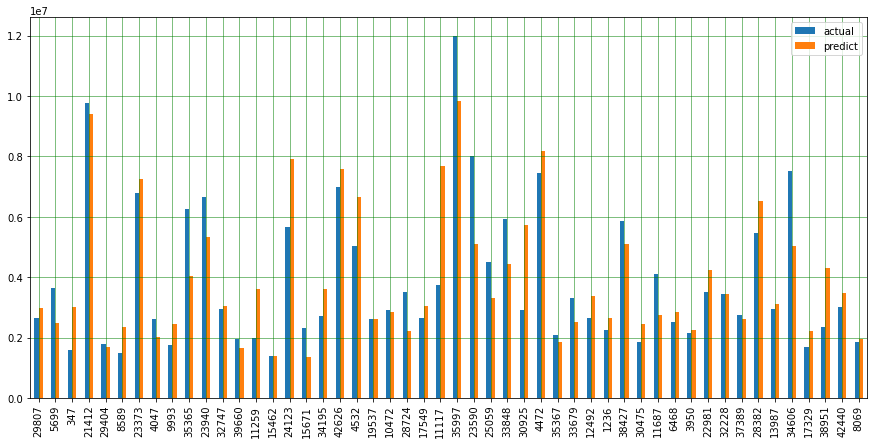

In [63]:
df_temp = frame_xgb.head(50)
df_temp.plot(kind='bar',figsize=(15,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# SVR ile model kurma

In [64]:
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [65]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [66]:
svr = SVR(kernel = 'rbf',degree=3)

svr.fit(X_train_scaled, y_train)

SVR()

In [67]:
print(svr.score(X_test_scaled,y_test))
print(svr.score(X_train_scaled,y_train))

-0.10706493514686732
-0.10100278123894935


In [68]:
y_pred_svr = svr.predict(X_test_scaled)

In [69]:
frame_svr = pd.DataFrame({"actual":y_test, "predict":y_pred_svr})

In [70]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_svr))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_svr))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_svr)))

Mean Absolute Error: 1963558.596703537
Mean Squared Error: 7994955755767.152
Root Mean Squared Error: 2827535.2793143275


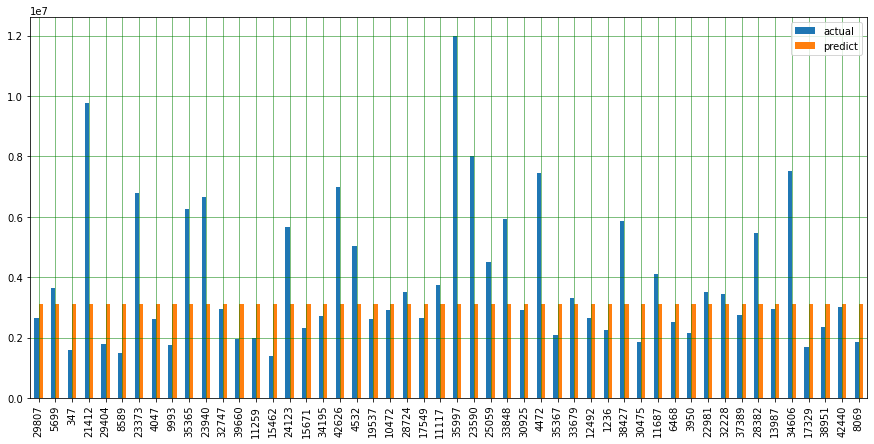

In [72]:
df_temp = frame_svr.head(50)
df_temp.plot(kind='bar',figsize=(15,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()